# Vizualização de dados

## vizualizando dados de PIB/municipio

### Importando as bibliotecas

In [489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
srn.set_theme(style="whitegrid")

In [490]:
db.isnull().sum()

CODIGO          0
MUNICIPIO       0
PIB             0
VALOREMPENHO    0
dtype: int64

In [491]:
db = pd.read_csv(r'dados\dados.csv', sep=';')
db.head()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86


In [492]:
db.shape

(187, 4)

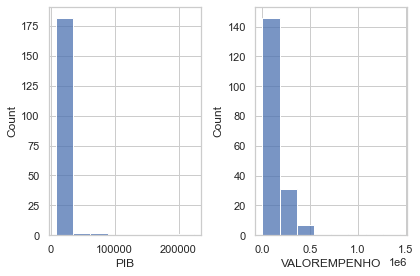

In [493]:
plt.figure()
plt.subplot(1, 2, 1)
srn.histplot(x=db.PIB, bins=8).set_title='PIB'
plt.subplot(1, 2, 2)
srn.histplot(x=db.VALOREMPENHO, bins=8).set_title='VALOR EMPENHO'
plt.tight_layout()

In [494]:
maiores_pibs =  db.nlargest(10, 'PIB')
maiores_pibs

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
49,149,TRIUNFO,223848.22,1442759.82
146,453,MUITOS CAPOES,72353.72,140597.55
91,356,GARRUCHOS,68672.25,271841.26
176,108,SANTA CRUZ DO SUL,40671.53,9637.00
155,476,CAPAO DO CIPO,36739.78,60851.00
68,75,MARAU,34568.53,193840.83
145,276,GLORINHA,33730.13,74325.48
169,329,VILA MARIA,31104.22,28149.89
175,96,PORTO ALEGRE,30524.80,9358.33
106,273,EUGENIO DE CASTRO,30468.92,105023.36


In [495]:
pib_municipio = maiores_pibs.iloc[::-1, 1:3]
pib_municipio

,MUNICIPIO,PIB
106,EUGENIO DE CASTRO,30468.92
175,PORTO ALEGRE,30524.80
169,VILA MARIA,31104.22
145,GLORINHA,33730.13
68,MARAU,34568.53
155,CAPAO DO CIPO,36739.78
176,SANTA CRUZ DO SUL,40671.53
91,GARRUCHOS,68672.25
146,MUITOS CAPOES,72353.72
49,TRIUNFO,223848.22


In [496]:
valor_municipio = maiores_pibs.iloc[::-1, [1,3]]
valor_municipio

,MUNICIPIO,VALOREMPENHO
106,EUGENIO DE CASTRO,105023.36
175,PORTO ALEGRE,9358.33
169,VILA MARIA,28149.89
145,GLORINHA,74325.48
68,MARAU,193840.83
155,CAPAO DO CIPO,60851.00
176,SANTA CRUZ DO SUL,9637.00
91,GARRUCHOS,271841.26
146,MUITOS CAPOES,140597.55
49,TRIUNFO,1442759.82


Text(0.5, 1.0, 'Municipio / Valor de Empenho')

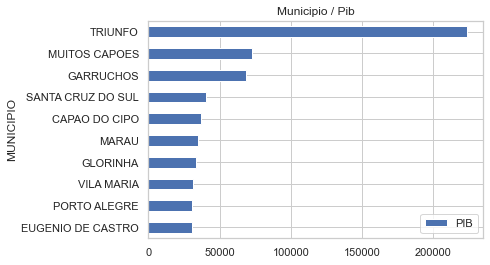

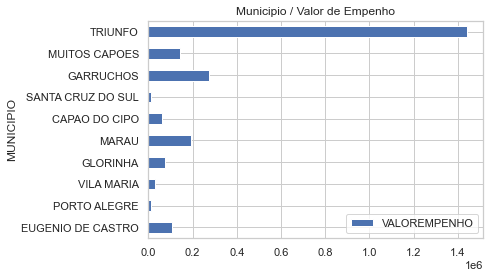

In [497]:
pib_municipio.plot.barh(x='MUNICIPIO', y='PIB').set_title('Municipio / Pib')

valor_municipio.plot.barh(x='MUNICIPIO', y='VALOREMPENHO').set_title('Municipio / Valor de Empenho')

In [498]:
pib_valor = maiores_pibs.iloc[::-1, 2:4]
pib_valor

,PIB,VALOREMPENHO
106,30468.92,105023.36
175,30524.80,9358.33
169,31104.22,28149.89
145,33730.13,74325.48
68,34568.53,193840.83
155,36739.78,60851.00
176,40671.53,9637.00
91,68672.25,271841.26
146,72353.72,140597.55
49,223848.22,1442759.82


### Ajuste para preencher 100%

In [499]:
ajuste = pib_valor.div(pib_valor.sum(axis=1), axis=0)*100
ajuste

,PIB,VALOREMPENHO
106,22.487569,77.512431
175,76.535618,23.464382
169,52.492933,47.507067
145,31.215529,68.784471
68,15.134463,84.865537
155,37.646774,62.353226
176,80.844203,19.155797
91,20.167261,79.832739
146,33.976656,66.023344
49,13.431366,86.568634


In [500]:
munip = maiores_pibs.iloc[::-1, [1]]
munip

,MUNICIPIO
106,EUGENIO DE CASTRO
175,PORTO ALEGRE
169,VILA MARIA
145,GLORINHA
68,MARAU
155,CAPAO DO CIPO
176,SANTA CRUZ DO SUL
91,GARRUCHOS
146,MUITOS CAPOES
49,TRIUNFO


### Juntando a lista ajustada com os municipios

In [501]:
ajuste.loc[:, 'MUNICIPIO']  = munip
ajuste

,PIB,VALOREMPENHO,MUNICIPIO
106,22.487569,77.512431,EUGENIO DE CASTRO
175,76.535618,23.464382,PORTO ALEGRE
169,52.492933,47.507067,VILA MARIA
145,31.215529,68.784471,GLORINHA
68,15.134463,84.865537,MARAU
155,37.646774,62.353226,CAPAO DO CIPO
176,80.844203,19.155797,SANTA CRUZ DO SUL
91,20.167261,79.832739,GARRUCHOS
146,33.976656,66.023344,MUITOS CAPOES
49,13.431366,86.568634,TRIUNFO


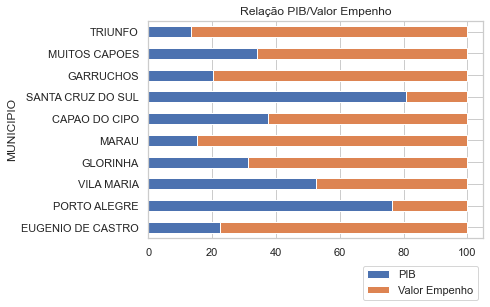

In [502]:
ajuste.plot.barh(x='MUNICIPIO', stacked=True).set_title('Relação PIB/Valor Empenho')
plt.legend(['PIB', 'Valor Empenho'], bbox_to_anchor=(1, -0.1))


<AxesSubplot:xlabel='VALOREMPENHO', ylabel='PIB'>

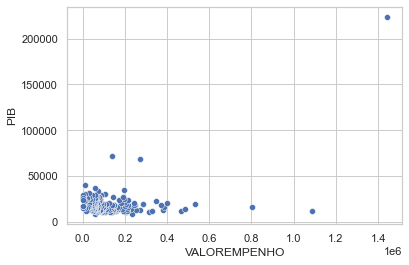

In [503]:
srn.scatterplot(x=db.VALOREMPENHO, y=db.PIB)